# Description des données

On utilise les bases fournies par le site https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/. On télécharge les données pour l'année 2016 pour commencer à visualiser les données

In [13]:

import pandas as pd

folder = "data/"
year = "2016"
files = ["usagers_", "vehicules_","lieux_", "caracteristiques_"]

dfs = []

for file in files:
    print( "loading database", file + year )
    df = pd.read_csv( folder + file + year + ".csv", delimiter =',', encoding='ANSI')
    dfs.append(df)

loading database usagers_2016
loading database vehicules_2016
loading database lieux_2016
loading database caracteristiques_2016


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


On regarde les différentes colonnes

In [35]:
for db in dfs:
    print(db.columns)

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')
Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')
Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')


Regardons la base combinée

In [16]:
# combined db
db_combined = dfs[0]
for i in range(3):
    db_combined = db_combined.merge(dfs[i+1], on='Num_Acc',how='left')

Examinons la catégorie 'catr' qui est celle assignée à notre groupe

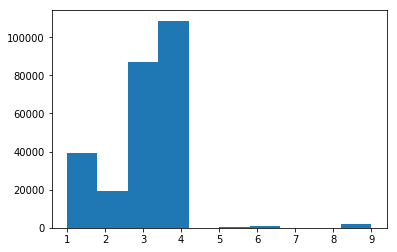

In [21]:
import matplotlib.pyplot as plt
plt.hist(db_combined['catr'])
plt.show()

In [34]:
dfs[2].describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,5.943200e+04,59432.000000,458.000000,59320.000000,59268.000000,24963.000000,24920.000000,59222.000000,59276.000000,59254.000000,57594.000000,57809.000000,59286.000000,59130.000000,59139.000000,59125.000000
mean,2.016000e+11,3.322133,2.113537,1.831339,2.038942,32.611626,385.797151,0.136706,1.114195,1.174537,5.141299,50.192755,1.214874,0.436411,1.126482,47.384169
std,1.715668e+04,1.146852,0.317595,0.773313,1.347160,118.285631,356.885231,0.568819,0.619874,0.735746,21.061400,62.855237,0.880435,1.348488,0.757122,49.315412
min,2.016000e+11,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016000e+11,3.000000,2.000000,1.000000,1.000000,3.000000,50.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,11.000000,350.000000,0.000000,1.000000,1.000000,0.000000,50.000000,1.000000,0.000000,1.000000,3.000000
75%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,31.000000,630.000000,0.000000,1.000000,1.000000,0.000000,73.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,3.000000,4.000000,13.000000,8370.000000,5660.000000,3.000000,4.000000,4.000000,907.000000,999.000000,9.000000,7.000000,5.000000,99.000000


examinons 'hrm'

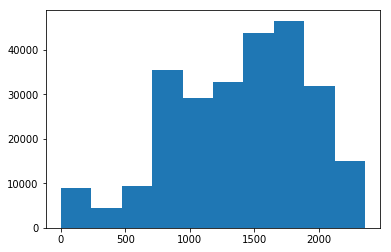

In [32]:
plt.hist( db_combined['hrmn'] )
plt.show()

0     1445
1     1445
2     1445
3     1445
4     1800
5     1800
6     1800
7     1900
8     1900
9     1930
10    1930
11    1930
12    1930
13    1930
14    1930
15    1100
16    1100
17    1100
18    1100
19    1100
20    1100
21    1115
22    1115
23    1145
24    1145
25    1145
26    1145
27    1145
28    1145
29    1915
      ... 
70     815
71     815
72     815
73     715
74     745
75     745
76     745
77     745
78    1915
79    1915
80    1915
81    1915
82    1915
83    1915
84    1915
85    1915
86    1915
87    1915
88    1915
89    1915
90    1915
91    1915
92    1915
93    1915
94    1915
95    1915
96    2030
97    2030
98    2030
99    2030
Name: hrmn, Length: 100, dtype: int64